In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/rsna-bone-age/boneage-training-dataset.csv
/kaggle/input/rsna-bone-age/boneage-test-dataset.csv
/kaggle/input/rsna-bone-age/boneage-training-dataset/boneage-training-dataset/9273.png
/kaggle/input/rsna-bone-age/boneage-training-dataset/boneage-training-dataset/14127.png
/kaggle/input/rsna-bone-age/boneage-training-dataset/boneage-training-dataset/9292.png
/kaggle/input/rsna-bone-age/boneage-training-dataset/boneage-training-dataset/11396.png
/kaggle/input/rsna-bone-age/boneage-training-dataset/boneage-training-dataset/14260.png
/kaggle/input/rsna-bone-age/boneage-training-dataset/boneage-training-dataset/4353.png
/kaggle/input/rsna-bone-age/boneage-training-dataset/boneage-training-dataset/7968.png
/kaggle/input/rsna-bone-age/boneage-training-dataset/boneage-training-dataset/6490.png
/kaggle/input/rsna-bone-age/boneage-training-dataset/boneage-training-dataset/5511.png
/kaggle/input/rsna-bone-age/boneage-training-dataset/boneage-training-dataset/6262.png
/kaggle/input/rsn

In [2]:
import numpy as np
import pandas as pd
import os
import cv2
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.mobilenet import preprocess_input
import seaborn as sns
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

2025-05-12 00:03:56.626273: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747008236.828627      31 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747008236.887927      31 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
data_path = "/kaggle/input/rsna-bone-age/boneage-training-dataset.csv"
df = pd.read_csv(data_path)

print("head of the data")
df.head()
print("info")
print(df.info())

print("describtion of columns: ")
print(df.describe())

print("null values is: ")
print(df.isnull().sum())

head of the data
info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12611 entries, 0 to 12610
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   id       12611 non-null  int64
 1   boneage  12611 non-null  int64
 2   male     12611 non-null  bool 
dtypes: bool(1), int64(2)
memory usage: 209.5 KB
None
describtion of columns: 
                 id       boneage
count  12611.000000  12611.000000
mean    8537.653001    127.320752
std     4108.763993     41.182021
min     1377.000000      1.000000
25%     5074.500000     96.000000
50%     8565.000000    132.000000
75%    12091.500000    156.000000
max    15610.000000    228.000000
null values is: 
id         0
boneage    0
male       0
dtype: int64


In [4]:
zero_bone_age_count = (df['boneage'] == 0).sum()

if zero_bone_age_count > 0:
    print(f"{zero_bone_age_count} ")
else:
    print("No age equal zero")
    

No age equal zero


In [5]:
min_age = df['boneage'].min()
print(f" min age: {min_age}")

max_age = df['boneage'].max()
print(f" max age: {max_age}")

 min age: 1
 max age: 228


In [6]:
age_counts = df['boneage'].value_counts()
print(age_counts)

#range of common maximum age
most_common_range = age_counts[age_counts == age_counts.max()].index.tolist()
print(f"range of common maximum age: {most_common_range}")

#range of common minimum age
least_common_range = age_counts[age_counts == age_counts.min()].index.tolist()
print(f"range of common minimum age: {least_common_range}")

boneage
156    1113
132    1084
120     992
168     892
162     682
       ... 
171       1
20        1
1         1
49        1
107       1
Name: count, Length: 160, dtype: int64
range of common maximum age: [156]
range of common minimum age: [103, 93, 182, 142, 179, 52, 161, 37, 206, 214, 188, 4, 143, 117, 29, 38, 172, 43, 77, 148, 80, 74, 116, 194, 151, 133, 109, 105, 177, 129, 14, 173, 197, 110, 86, 167, 171, 20, 1, 49, 107]


In [7]:
import pandas as pd
import os

# Assuming the following file structure:
# - Your script is in the project root directory
# - CSV file is in 'data/metadata.csv'
# - Images are in 'data/images/'

# Load the metadata CSV file
df = pd.read_csv("/kaggle/input/rsna-bone-age/boneage-training-dataset.csv")  # Adjust path as needed

# 1. Rename 'male' column to 'sex' and convert boolean to numeric
df = df.rename(columns={'male': 'sex'})
df['sex'] = df['sex'].astype(int)  # True->1, False->0
image_folder = '/kaggle/input/rsna-bone-age/boneage-training-dataset/boneage-training-dataset'  # Adjust this path to your actual image folder
df['image_path'] = df['id'].apply(lambda x: os.path.join(image_folder, f"{x}.png"))
final_df = df[['image_path', 'sex', 'boneage']].copy()
print(final_df.head())
print(f"\nTotal records: {len(final_df)}")

                                          image_path  sex  boneage
0  /kaggle/input/rsna-bone-age/boneage-training-d...    0      180
1  /kaggle/input/rsna-bone-age/boneage-training-d...    0       12
2  /kaggle/input/rsna-bone-age/boneage-training-d...    0       94
3  /kaggle/input/rsna-bone-age/boneage-training-d...    1      120
4  /kaggle/input/rsna-bone-age/boneage-training-d...    0       82

Total records: 12611


In [8]:
import pandas as pd

# Load the metadata CSV file
df = pd.read_csv('/kaggle/input/rsna-bone-age/boneage-training-dataset.csv')  # Adjust path as needed

# 1. Rename 'male' column to 'sex' and convert boolean to numeric
df = df.rename(columns={'male': 'sex'})
df['sex'] = df['sex'].astype(int)  # True->1, False->0

# 2. Create image paths with just the filename (id.png)
df['image_path'] = df['id'].astype(str) + '.png'

# 3. Create the final DataFrame with desired columns
final_df = df[['image_path', 'sex', 'boneage']].copy()

# Verify the results
print(final_df.head())
print(f"\nTotal records: {len(final_df)}")


  image_path  sex  boneage
0   1377.png    0      180
1   1378.png    0       12
2   1379.png    0       94
3   1380.png    1      120
4   1381.png    0       82

Total records: 12611


In [9]:
sex_counts = df['sex'].value_counts()

# عرض النتائج
print(f"عدد الذكور (Male): {sex_counts[1]}")
print(f"عدد الإناث (Female): {sex_counts[0]}")

عدد الذكور (Male): 6833
عدد الإناث (Female): 5778


In [10]:
#find boneage that are greater than 216 (18 yrs)
count_older_than_216 = df[df['boneage'] > 216].shape[0]

print(f"number of boneages greater than 216 are:  {count_older_than_216}")

number of boneages greater than 216 are:  21


In [11]:
import pandas as pd

initial_count = len(final_df)

# Filter rows where boneage <= 216
filtered_df = final_df[final_df['boneage'] <= 216]

# Count rows after filtering
filtered_count = len(filtered_df)

# Calculate how many rows were removed
rows_removed = initial_count - filtered_count

# Print results
print(f"Initial number of rows: {initial_count}")
print(f"Rows remaining after filtering: {filtered_count}")
print(f"Rows removed: {rows_removed}")
final_df = filtered_df.copy()


Initial number of rows: 12611
Rows remaining after filtering: 12590
Rows removed: 21


In [12]:
import pandas as pd

# Define the age classification function
def classify_age(age):
    if age <= 54:
        return 'Infant'
    elif age <= 108:
        return 'Toddler'
    elif age <= 162:
        return 'School-age Children'
    else:
        return 'Teenager' 

# Add the new age_class column
final_df['age_class'] = final_df['boneage'].apply(classify_age)

# Show the distribution of age classes
print("\nAge Class Distribution:")
print(final_df['age_class'].value_counts())

# Show the first few rows to verify
print("\nSample of the updated DataFrame:")
print(final_df.head())


Age Class Distribution:
age_class
School-age Children    6279
Toddler                3391
Teenager               2155
Infant                  765
Name: count, dtype: int64

Sample of the updated DataFrame:
  image_path  sex  boneage            age_class
0   1377.png    0      180             Teenager
1   1378.png    0       12               Infant
2   1379.png    0       94              Toddler
3   1380.png    1      120  School-age Children
4   1381.png    0       82              Toddler


In [13]:
len(final_df)

12590

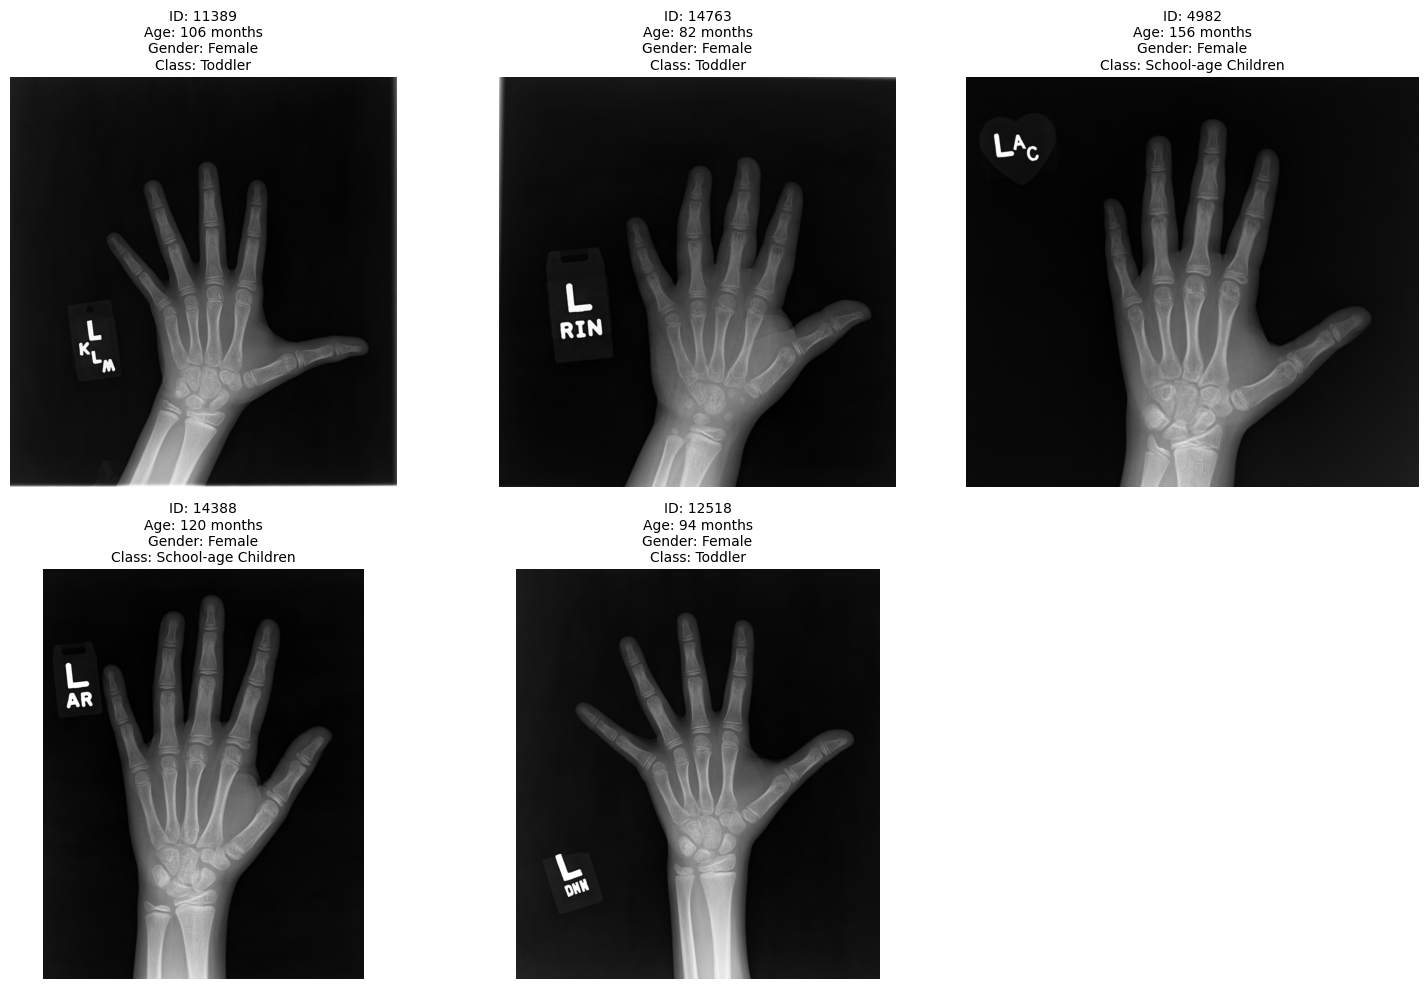


Random Samples Information:

Image: 11389.png
Bone Age: 106 months
Gender: Female
Age Class: Toddler

Image: 14763.png
Bone Age: 82 months
Gender: Female
Age Class: Toddler

Image: 4982.png
Bone Age: 156 months
Gender: Female
Age Class: School-age Children

Image: 14388.png
Bone Age: 120 months
Gender: Female
Age Class: School-age Children

Image: 12518.png
Bone Age: 94 months
Gender: Female
Age Class: Toddler


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import os

# Load your dataset
# df = pd.read_csv('your_dataset.csv')  # Uncomment if needed

# Select 5 random samples
random_samples = final_df.sample(n=5, random_state=42)  # Using fixed seed for reproducibility

# Set up the plot
plt.figure(figsize=(15, 10))

# Display each sample
for i, (_, row) in enumerate(random_samples.iterrows(), 1):
    img_path = os.path.join('/kaggle/input/rsna-bone-age/boneage-training-dataset/boneage-training-dataset', row['image_path'])  # Adjust path as needed
    img = plt.imread(img_path)
    
    plt.subplot(2, 3, i)
    plt.imshow(img, cmap='gray')
    
    # Format gender for display
    gender = 'Male' if row['sex'] == 1 else 'Female'
    
    # Create title with metadata
    title = (f"ID: {row['image_path'].split('.')[0]}\n"
             f"Age: {row['boneage']} months\n"
             f"Gender: {gender}\n"
             f"Class: {row['age_class']}")
    
    plt.title(title, fontsize=10)
    plt.axis('off')

plt.tight_layout()
plt.show()

# Print the same information in text format
print("\nRandom Samples Information:")
for _, row in random_samples.iterrows():
    gender = 'Male' if row['sex'] == 1 else 'Female'
    print(f"\nImage: {row['image_path']}")
    print(f"Bone Age: {row['boneage']} months")
    print(f"Gender: {gender}")
    print(f"Age Class: {row['age_class']}")

In [15]:
from sklearn.model_selection import train_test_split
import pandas as pd

# Split the data (stratified by age_class and sex to maintain distribution)
train_df, eval_df = train_test_split(
    final_df,
    test_size=0.1,  # 10% for evaluation
    random_state=42,  # For reproducibility
    stratify=final_df[['age_class', 'sex']]  # Maintain class/gender balance
)

# Print the results
print(f"Original dataset size: {len(final_df)}")
print(f"Training set size: {len(train_df)} ({len(train_df)/len(final_df)*100:.1f}%)")
print(f"Evaluation set size: {len(eval_df)} ({len(eval_df)/len(final_df)*100:.1f}%)")

# Optional: Verify class distribution
print("\nAge class distribution in training set:")
print(train_df['age_class'].value_counts(normalize=True))

print("\nAge class distribution in evaluation set:")
print(eval_df['age_class'].value_counts(normalize=True))

print("\nGender distribution in training set:")
print(train_df['sex'].value_counts(normalize=True))

print("\nGender distribution in evaluation set:")
print(eval_df['sex'].value_counts(normalize=True))

Original dataset size: 12590
Training set size: 11331 (90.0%)
Evaluation set size: 1259 (10.0%)

Age class distribution in training set:
age_class
School-age Children    0.498720
Toddler                0.269350
Teenager               0.171123
Infant                 0.060807
Name: proportion, dtype: float64

Age class distribution in evaluation set:
age_class
School-age Children    0.498809
Toddler                0.269261
Teenager               0.171565
Infant                 0.060365
Name: proportion, dtype: float64

Gender distribution in training set:
sex
1    0.541082
0    0.458918
Name: proportion, dtype: float64

Gender distribution in evaluation set:
sex
1    0.540905
0    0.459095
Name: proportion, dtype: float64


In [16]:
import os
from datetime import datetime

# Create the directory if it doesn't exist
os.makedirs("data/splits", exist_ok=True)

# Save to CSV with timestamps
timestamp = datetime.now().strftime("%Y%m%d_%H%M")

train_filename = f"data/splits/train_set_{timestamp}.csv"
eval_filename = f"data/splits/eval_set_{timestamp}.csv"

train_df.to_csv(train_filename, index=False)
eval_df.to_csv(eval_filename, index=False)

print(f"Saved training set ({len(train_df)} samples) to: {train_filename}")
print(f"Saved evaluation set ({len(eval_df)} samples) to: {eval_filename}")

# Additional verification
print("\nVerification:")
print(f"Original samples: {len(final_df)}")
print(f"Train + Eval samples: {len(train_df) + len(eval_df)}")
print(f"Train/Eval ratio: {len(train_df)/len(eval_df):.1f}:1")


Saved training set (11331 samples) to: data/splits/train_set_20250512_0004.csv
Saved evaluation set (1259 samples) to: data/splits/eval_set_20250512_0004.csv

Verification:
Original samples: 12590
Train + Eval samples: 12590
Train/Eval ratio: 9.0:1


In [18]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import Xception
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Input, Concatenate, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
import cv2
from tqdm import tqdm

In [19]:

# 1. Configuration
BASE_IMAGE_DIR = '/kaggle/input/rsna-bone-age/boneage-training-dataset/boneage-training-dataset'  # Update this to your image directory
OUTPUT_DIR = './bone_age_models'
os.makedirs(OUTPUT_DIR, exist_ok=True)
IMAGE_SIZE = (224, 224)  # ResNet's optimal input size
BATCH_SIZE = 16
K_FOLDS = 5
EPOCHS = 40
LEARNING_RATE = 0.0001

In [20]:
# 2. CLAHE Image Enhancement Function
def apply_clahe_on_hand(img):
    """Apply CLAHE to enhance hand X-ray contrast"""
    # Convert to float and normalize if needed
    if img.dtype != np.float32:
        img = img.astype(np.float32)
        if img.max() > 1.0:
            img = img / 255.0
    
    # Convert to uint8 for CLAHE
    img_uint8 = (img * 255).astype(np.uint8)
    
    # Convert RGB to grayscale if needed
    if len(img_uint8.shape) == 3 and img_uint8.shape[2] > 1:
        img_uint8 = cv2.cvtColor(img_uint8, cv2.COLOR_RGB2GRAY)
    
    # Apply CLAHE
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced = clahe.apply(img_uint8)
    
    # Convert back to float32 and normalize
    enhanced = enhanced.astype(np.float32) / 255.0
    
    # Reshape for model input (add channel dimension if needed)
    if len(enhanced.shape) == 2:
        enhanced = enhanced[..., np.newaxis]
    
    # Convert single channel to 3 channels for ResNet
    if enhanced.shape[-1] == 1:
        enhanced = np.repeat(enhanced, 3, axis=-1)
    
    return enhanced

In [22]:
# 3. Path Verification and Correction
def verify_and_correct_paths(df):
    """Ensure all image paths are valid"""
    # Convert to absolute paths
    df['abs_path'] = df['image_path'].apply(
        lambda x: os.path.join(BASE_IMAGE_DIR, os.path.basename(x))
    )
    
    # Check existence
    df['exists'] = df['abs_path'].apply(os.path.exists)
    missing = df[~df['exists']]
    
    if len(missing) > 0:
        print(f"\nWarning: {len(missing)} missing files. Trying alternatives...")
        
        # Try different extensions
        for ext in ['.png', '.jpg', '.jpeg']:
            df['alt_path'] = df['image_path'].apply(
                lambda x: os.path.join(BASE_IMAGE_DIR, f"{os.path.splitext(os.path.basename(x))[0]}{ext}")
            )
            df['exists'] = df['alt_path'].apply(os.path.exists)
            
            if df['exists'].all():
                print(f"Found all files with {ext} extension")
                df['abs_path'] = df['alt_path']
                break
    
    if not df['exists'].all():
        missing_samples = df[~df['exists']]['image_path'].head().tolist()
        raise FileNotFoundError(
            f"Missing {len(df[~df['exists']])} images. Examples: {missing_samples}"
        )
    
    return df

In [23]:
class BoneAgeDataGenerator(tf.keras.utils.Sequence):
    def __init__(self, dataframe, x_col, y_col, gender_col, batch_size=32, 
                 target_size=(224, 224), shuffle=True, augment=False):
        self.dataframe = dataframe
        self.x_col = x_col
        self.y_col = y_col
        self.gender_col = gender_col
        self.batch_size = batch_size
        self.target_size = target_size
        self.shuffle = shuffle
        self.augment = augment
        self.n = len(dataframe)
        self.indexes = np.arange(self.n)
        
        # Create augmentation generator if needed
        if self.augment:
            self.image_gen = ImageDataGenerator(
                rotation_range=20,
                width_shift_range=0.1,
                height_shift_range=0.1,
                shear_range=0.1,
                zoom_range=0.1,
                horizontal_flip=True,
                fill_mode='nearest'
            )
        else:
            self.image_gen = None
            
        self.on_epoch_end()
        
    def __len__(self):
        return int(np.ceil(self.n / self.batch_size))
    
    def __getitem__(self, index):
        # Generate indexes of the batch
        batch_indexes = self.indexes[index * self.batch_size:(index + 1) * self.batch_size]
        batch_df = self.dataframe.iloc[batch_indexes]
        
        # Generate data
        X_img = np.zeros((len(batch_df), self.target_size[0], self.target_size[1], 3), dtype=np.float32)
        
        # Fix: Reshape gender array to (batch_size, 1)
        X_gender = np.array(batch_df[self.gender_col].values, dtype=np.float32).reshape(-1, 1)
        
        y = np.array(batch_df[self.y_col].values, dtype=np.float32)
        
        # Load and preprocess images
        for i, filepath in enumerate(batch_df[self.x_col].values):
            # Load image
            img = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, self.target_size)
            
            # Apply CLAHE enhancement
            img = apply_clahe_on_hand(img)
            
            # Apply augmentation if needed
            if self.augment and self.image_gen:
                img = self.image_gen.random_transform(img)
                
            X_img[i] = img
            
        # Normalize bone age for better training stability
        y = y / 240.0  # Normalize by approximate max bone age in months
        
        return (X_img, X_gender), y
    
    def on_epoch_end(self):
        if self.shuffle:
            np.random.shuffle(self.indexes)

In [24]:
# 5. Create ResNet-based model with dual inputs
def create_resnet_model():
    # Image input branch
    img_input = Input(shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3), name='image_input')
    
    # Use ResNet50 with pre-trained weights, exclude top layers
    base_model = ResNet50(
        weights='imagenet',
        include_top=False,
        input_tensor=img_input
    )
    
    # Freeze early layers for transfer learning
    for layer in base_model.layers[:100]:
        layer.trainable = False
        
    # Process image with ResNet
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)
    x = Dense(256, activation='relu')(x)
    img_features = Dropout(0.5)(x)
    
    # Gender input branch (separate pathway)
    gender_input = Input(shape=(1,), name='gender_input')
    gender_features = Dense(32, activation='relu')(gender_input)
    gender_features = Dense(64, activation='relu')(gender_features)
    
    # Combine features from both pathways
    combined = Concatenate()([img_features, gender_features])
    
    # Additional dense layers after concatenation
    x = Dense(128, activation='relu')(combined)
    x = Dropout(0.3)(x)
    x = Dense(64, activation='relu')(x)
    x = Dropout(0.3)(x)
    
    # Output layer for regression
    output = Dense(1, activation='linear', name='boneage_output')(x)
    
    # Create and compile the full model
    model = Model(inputs=[img_input, gender_input], outputs=output)
    model.compile(
        optimizer=Adam(learning_rate=LEARNING_RATE),
        loss='mse',
        metrics=['mae']
    )
    
    return model

In [25]:
# 6. Training History Plotting Function
def plot_training_history(history, fold_idx=None):
    """Plot training and validation metrics"""
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Plot loss
    ax1.plot(history.history['loss'], label='Training Loss')
    ax1.plot(history.history['val_loss'], label='Validation Loss')
    ax1.set_title('Model Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss (MSE)')
    ax1.legend()
    ax1.grid(True)
    
    # Plot MAE
    ax2.plot(history.history['mae'], label='Training MAE')
    ax2.plot(history.history['val_mae'], label='Validation MAE')
    ax2.set_title('Model MAE')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Mean Absolute Error')
    ax2.legend()
    ax2.grid(True)
    
    plt.tight_layout()
    
    # Save figure if fold is specified
    if fold_idx is not None:
        plt.savefig(f'{OUTPUT_DIR}/training_history_fold_{fold_idx}.png')
    
    plt.show()

In [26]:
# 7. Prediction vs True Value Visualization
def plot_predictions(y_true, y_pred, fold_idx=None):
    """Plot predicted vs true bone age values"""
    # Unnormalize values back to months
    y_true_months = y_true * 240
    y_pred_months = y_pred * 240
    
    # Calculate metrics
    mae = mean_absolute_error(y_true_months, y_pred_months)
    mse = mean_squared_error(y_true_months, y_pred_months)
    r2 = r2_score(y_true_months, y_pred_months)
    
    # Create scatter plot
    plt.figure(figsize=(10, 8))
    
    # Plot ideal line
    max_val = max(y_true_months.max(), y_pred_months.max())
    min_val = min(y_true_months.min(), y_pred_months.min())
    plt.plot([min_val, max_val], [min_val, max_val], 'r--', label='Ideal Prediction')
    
    # Plot predictions with gender color coding
    plt.scatter(y_true_months, y_pred_months, alpha=0.6)
    
    plt.title(f'Predicted vs True Bone Age\nMAE: {mae:.2f} months, MSE: {mse:.2f}, R²: {r2:.4f}')
    plt.xlabel('True Bone Age (months)')
    plt.ylabel('Predicted Bone Age (months)')
    plt.grid(True)
    plt.legend()
    
    # Add regression line
    z = np.polyfit(y_true_months, y_pred_months, 1)
    p = np.poly1d(z)
    plt.plot(y_true_months, p(y_true_months), "b-", alpha=0.5, label=f'Fit: y={z[0]:.3f}x+{z[1]:.3f}')
    
    # Save figure if fold is specified
    if fold_idx is not None:
        plt.savefig(f'{OUTPUT_DIR}/predictions_fold_{fold_idx}.png')
    
    plt.show()
    
    return mae, mse, r2


TESTING DATA PIPELINE

Input shapes:
X_img shape: (4, 224, 224, 3)
X_gender shape: (4, 1)
y_true shape: (4,)

Value ranges:
X_img min: 0.0039, max: 1.0000
X_gender values: [0. 1. 0. 0.]
y_true values: [0.25       0.2        0.7        0.34166667]


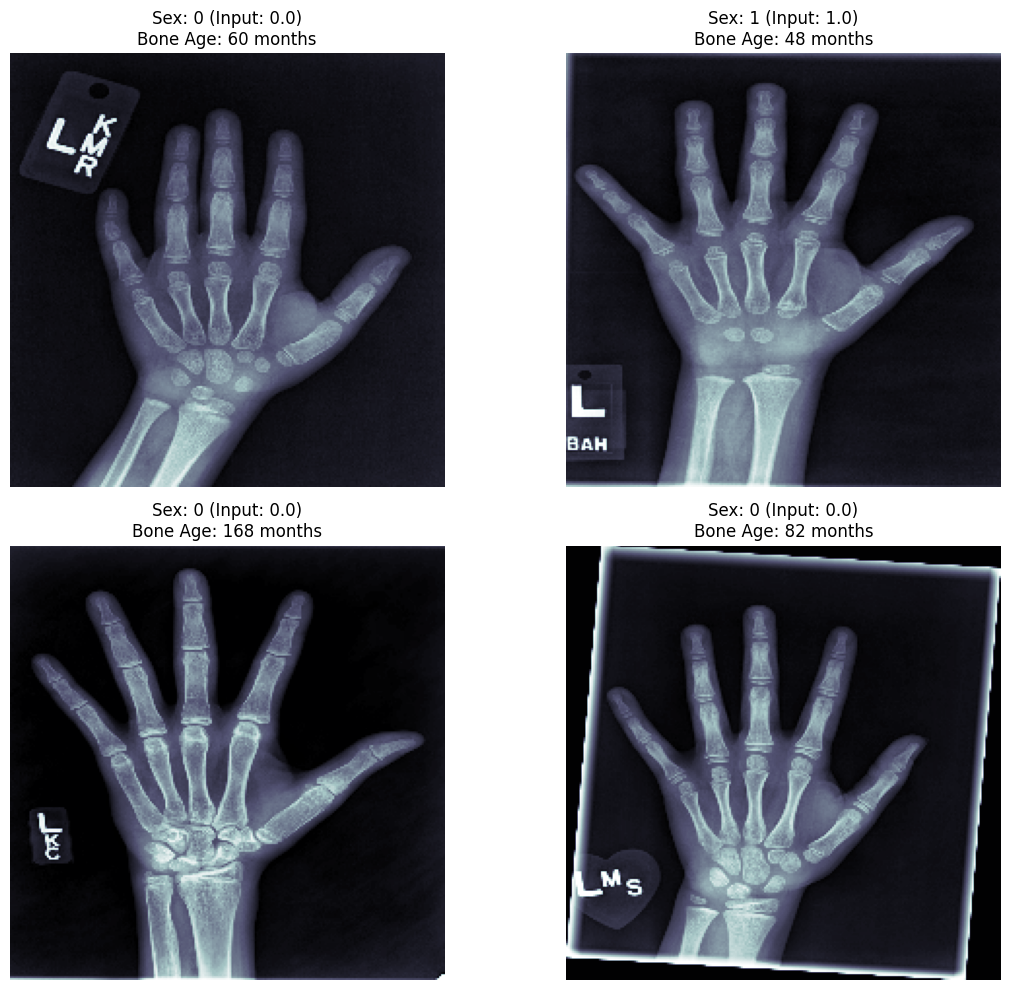


Testing model input compatibility...

Error when testing model input: name 'ResNet50' is not defined

Data pipeline test FAILED! ✗
Bone Age Mean: 127.09, Std: 41.05


In [27]:
# 8. Main Execution
if __name__ == "__main__":
    # Load your DataFrame here
    # Assuming final_df contains columns: image_path, sex, boneage, age_class
    # Example:
    # final_df = pd.read_csv('your_data.csv')

    # Split data (90% train, 10% eval)
    # You mentioned you've already done this, so use your existing split
    # train_df, eval_df = train_test_split(final_df, test_size=0.1, stratify=final_df['age_class'], random_state=42)

    # Verify and correct paths
    train_df = verify_and_correct_paths(train_df)
    eval_df = verify_and_correct_paths(eval_df)

    # ============================================================
    # INSERT TEST CODE HERE - Test the data pipeline
    # This will help ensure inputs are correctly prepared
    def test_data_pipeline(dataframe, batch_size=4):
        """
        Test function to verify that the data generator correctly prepares both
        image and sex inputs before passing them to the model.

        Args:
            dataframe: The DataFrame containing your data (train_df or a subset)
            batch_size: Number of samples to test (small number for easy visualization)
        """
        import matplotlib.pyplot as plt
        import numpy as np

        print("\n" + "="*50)
        print("TESTING DATA PIPELINE")
        print("="*50)

        # Create a small test generator
        test_gen = BoneAgeDataGenerator(
            dataframe=dataframe.head(batch_size),  # Just use a few samples
            x_col='abs_path',
            y_col='boneage',
            gender_col='sex',
            batch_size=batch_size,
            target_size=IMAGE_SIZE,
            shuffle=False,
            augment=False
        )

        # Get a batch of data
        [X_img, X_gender], y_true = test_gen[0]

        # Print shapes
        print(f"\nInput shapes:")
        print(f"X_img shape: {X_img.shape}")
        print(f"X_gender shape: {X_gender.shape}")
        print(f"y_true shape: {y_true.shape}")

        # Print value ranges
        print(f"\nValue ranges:")
        print(f"X_img min: {X_img.min():.4f}, max: {X_img.max():.4f}")
        print(f"X_gender values: {X_gender.flatten()}")
        print(f"y_true values: {y_true}")

        # Visualize the images and their metadata
        fig, axes = plt.subplots(2, 2, figsize=(12, 10))
        axes = axes.flatten()

        for i in range(min(batch_size, 4)):
            # Get the original values from the dataframe
            original_sex = dataframe.iloc[i]['sex']
            original_boneage = dataframe.iloc[i]['boneage']

            # Display the image
            axes[i].imshow(X_img[i][:,:,0], cmap='bone')
            # Fix: Access X_gender correctly - it could be a scalar or 1D array depending on batching
            gender_val = X_gender[i]
            if hasattr(gender_val, "__len__") and len(gender_val) > 0:
                gender_val = gender_val[0]  # If it's an array, get the first element

            axes[i].set_title(f"Sex: {original_sex} (Input: {gender_val})\nBone Age: {original_boneage} months")
            axes[i].axis('off')

        plt.tight_layout()
        plt.show()

        # Test if the model input works correctly
        print("\nTesting model input compatibility...")
        try:
            # Create a small test model
            model = create_resnet_model()
            print("Model created successfully.")

            # Test prediction
            test_pred = model.predict([X_img, X_gender])
            print(f"Prediction shape: {test_pred.shape}")
            print(f"Prediction values: {test_pred.flatten() * 240}")  # Unnormalize
            print("\nData pipeline test PASSED! ✓")
            print("="*50)
        except Exception as e:
            print(f"\nError when testing model input: {e}")
            print("\nData pipeline test FAILED! ✗")
            print("="*50)

    # Run the test
    test_data_pipeline(train_df)
    # ============================================================

    # Normalize bone age for better model convergence
    # This normalization helps with training stability
    bone_age_mean = train_df['boneage'].mean()
    bone_age_std = train_df['boneage'].std()
    print(f"Bone Age Mean: {bone_age_mean:.2f}, Std: {bone_age_std:.2f}")

In [28]:
# Initialize results storage
all_fold_results = []

# Create stratified k-fold
strat_kfold = StratifiedKFold(n_splits=K_FOLDS, shuffle=True, random_state=42)

for fold_idx, (train_idx, val_idx) in enumerate(strat_kfold.split(train_df, train_df['age_class'])):
    print(f"\n{'='*40}")
    print(f"Fold {fold_idx + 1}/{K_FOLDS}")
    print(f"{'='*40}")
    
    # Get fold data
    df_train_fold = train_df.iloc[train_idx]
    df_val_fold = train_df.iloc[val_idx]
    
    # هنا يجب إضافة الكود المتعلق بالتدريب أو معالجة البيانات داخل الحلقة



Fold 1/5

Fold 2/5

Fold 3/5

Fold 4/5

Fold 5/5


In [29]:
# Create data generators
train_gen = BoneAgeDataGenerator(
            dataframe=df_train_fold,
            x_col='abs_path',
            y_col='boneage',
            gender_col='sex',
            batch_size=BATCH_SIZE,
            target_size=IMAGE_SIZE,
            shuffle=True,
            augment=True
        )
        
val_gen = BoneAgeDataGenerator(
            dataframe=df_val_fold,
            x_col='abs_path',
            y_col='boneage',
            gender_col='sex',
            batch_size=BATCH_SIZE,
            target_size=IMAGE_SIZE,
            shuffle=False,
            augment=False
        )
        

In [31]:
from tensorflow.keras.applications import ResNet50
# Create model
model = create_resnet_model()
# Define callbacks
checkpoint = ModelCheckpoint(
    f'{OUTPUT_DIR}/best_model_fold_{fold_idx+1}.keras',
    monitor='val_mae',
    mode='min',
    save_best_only=True,
    verbose=1
)
early_stopping = EarlyStopping(
    monitor='val_mae',
    patience=5,
    restore_best_weights=True,
    verbose=1
)
reduce_lr = ReduceLROnPlateau(
    monitor='val_mae',
    factor=0.5,
    patience=3,
    min_lr=1e-6,
    verbose=1
)
# Train model
print("\nTraining model...")
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=EPOCHS,
    callbacks=[checkpoint, early_stopping, reduce_lr],
    verbose=1
)

I0000 00:00:1747008850.985527      31 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

Training model...
Epoch 1/40


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1747008887.654182     103 service.cc:148] XLA service 0x7e123c002b20 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1747008887.655123     103 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1747008890.465609     103 cuda_dnn.cc:529] Loaded cuDNN version 90300


  2/567 ━━━━━━━━━━━━━━━━━━━━ 36s 65ms/step - loss: 3.3762 - mae: 1.6434   

I0000 00:00:1747008901.696665     103 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


567/567 ━━━━━━━━━━━━━━━━━━━━ 0s 668ms/step - loss: 0.2545 - mae: 0.3465
Epoch 1: val_mae improved from inf to 0.19193, saving model to ./bone_age_models/best_model_fold_5.keras
567/567 ━━━━━━━━━━━━━━━━━━━━ 505s 809ms/step - loss: 0.2543 - mae: 0.3463 - val_loss: 0.0494 - val_mae: 0.1919 - learning_rate: 1.0000e-04
Epoch 2/40
567/567 ━━━━━━━━━━━━━━━━━━━━ 0s 560ms/step - loss: 0.0531 - mae: 0.1871
Epoch 2: val_mae did not improve from 0.19193
567/567 ━━━━━━━━━━━━━━━━━━━━ 381s 664ms/step - loss: 0.0530 - mae: 0.1871 - val_loss: 0.0676 - val_mae: 0.2285 - learning_rate: 1.0000e-04
Epoch 3/40
567/567 ━━━━━━━━━━━━━━━━━━━━ 0s 561ms/step - loss: 0.0435 - mae: 0.1682
Epoch 3: val_mae did not improve from 0.19193
567/567 ━━━━━━━━━━━━━━━━━━━━ 381s 665ms/step - loss: 0.0435 - mae: 0.1682 - val_loss: 0.0489 - val_mae: 0.1922 - learning_rate: 1.0000e-04
Epoch 4/40
567/567 ━━━━━━━━━━━━━━━━━━━━ 0s 570ms/step - loss: 0.0374 - mae: 0.1564
Epoch 4: val_mae improved from 0.19193 to 0.15348, saving model t


Plotting training history...


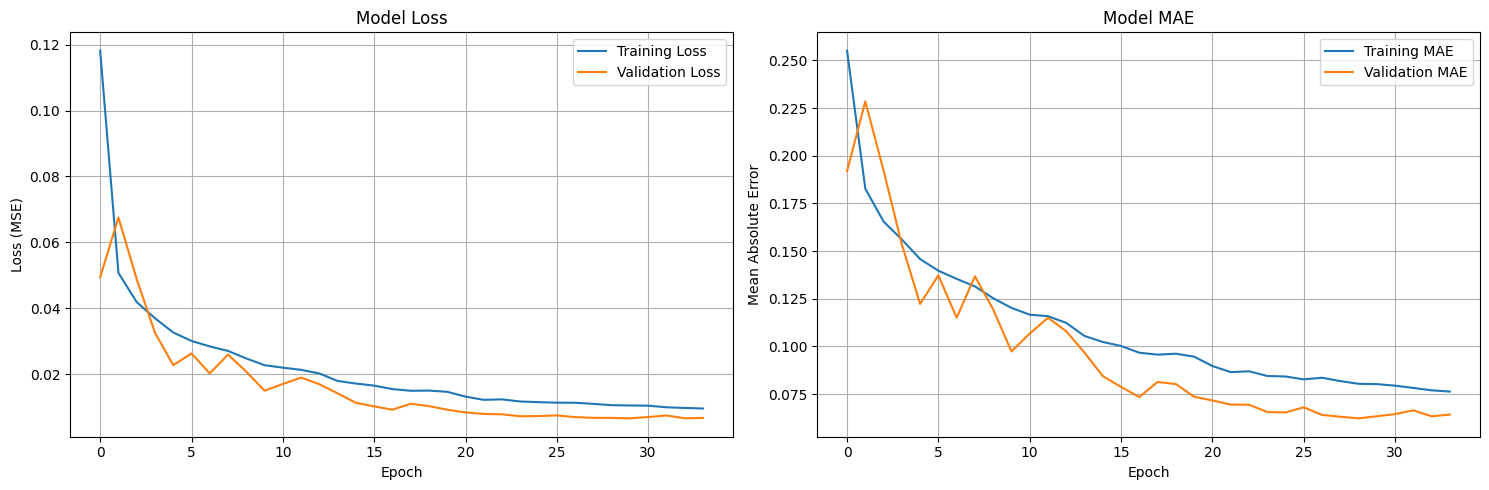

In [32]:
print("\nPlotting training history...")
plot_training_history(history, fold_idx + 1)


In [33]:
print("\nEvaluating on validation data...")
val_predictions = []
val_true_values = []

for i in range(len(val_gen)):
    [x_img, x_gender], y_true = val_gen[i]
    y_pred = model.predict([x_img, x_gender])
    val_predictions.extend(y_pred.flatten())
    val_true_values.extend(y_true)

val_predictions = np.array(val_predictions)
val_true_values = np.array(val_true_values)



Evaluating on validation data...
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━


Plotting validation predictions...


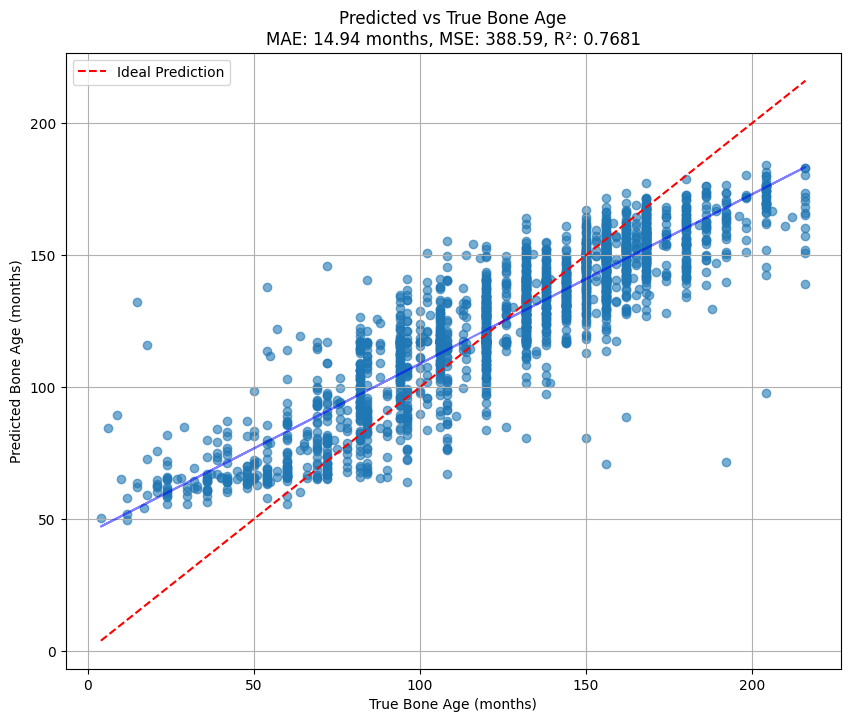

In [34]:
print("\nPlotting validation predictions...")
val_mae, val_mse, val_r2 = plot_predictions(val_true_values, val_predictions, fold_idx + 1)

fold_result = {
    'fold': fold_idx + 1,
    'val_mae': val_mae,
    'val_mse': val_mse,
    'val_r2': val_r2
}
all_fold_results.append(fold_result)


In [35]:
model.save(f'{OUTPUT_DIR}/final_model_fold_{fold_idx + 1}.keras')
print(f"\nFinal model saved to {OUTPUT_DIR}/final_model_fold_{fold_idx + 1}.keras")



Final model saved to ./bone_age_models/final_model_fold_5.keras


In [36]:
results_df = pd.DataFrame(all_fold_results)
print("\nCross-validation results:")
print(results_df)
print(f"\nMean MAE: {results_df['val_mae'].mean():.2f} ± {results_df['val_mae'].std():.2f}")
print(f"Mean MSE: {results_df['val_mse'].mean():.2f} ± {results_df['val_mse'].std():.2f}")
print(f"Mean R²: {results_df['val_r2'].mean():.4f} ± {results_df['val_r2'].std():.4f}")



Cross-validation results:
   fold    val_mae     val_mse   val_r2
0     5  14.939748  388.588257  0.76813

Mean MAE: 14.94 ± nan
Mean MSE: 388.59 ± nan
Mean R²: 0.7681 ± nan


In [37]:
print("\n\nPerforming final evaluation on test set...")

best_fold = results_df.loc[results_df['val_mae'].idxmin()]['fold']
best_model_path = f'{OUTPUT_DIR}/best_model_fold_{int(best_fold)}.keras'

print(f"Loading best model from {best_model_path}")
best_model = load_model(best_model_path)




Performing final evaluation on test set...
Loading best model from ./bone_age_models/best_model_fold_5.keras


In [38]:
test_gen = BoneAgeDataGenerator(
    dataframe=eval_df,
    x_col='abs_path',
    y_col='boneage',
    gender_col='sex',
    batch_size=BATCH_SIZE,
    target_size=IMAGE_SIZE,
    shuffle=False,
    augment=False
)


In [39]:
test_predictions = []
test_true_values = []

print("Generating predictions...")
for i in tqdm(range(len(test_gen))):
    [x_img, x_gender], y_true = test_gen[i]
    y_pred = best_model.predict([x_img, x_gender])
    test_predictions.extend(y_pred.flatten())
    test_true_values.extend(y_true)

test_predictions = np.array(test_predictions)
test_true_values = np.array(test_true_values)


Generating predictions...


  0%|          | 0/79 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


  1%|▏         | 1/79 [00:05<06:44,  5.18s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


  3%|▎         | 2/79 [00:05<03:13,  2.51s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


  4%|▍         | 3/79 [00:06<02:08,  1.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


  5%|▌         | 4/79 [00:07<01:37,  1.29s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


  6%|▋         | 5/79 [00:07<01:19,  1.08s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


  8%|▊         | 6/79 [00:08<01:08,  1.07it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


  9%|▉         | 7/79 [00:09<01:00,  1.19it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 10%|█         | 8/79 [00:09<00:55,  1.29it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 11%|█▏        | 9/79 [00:10<00:51,  1.36it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 13%|█▎        | 10/79 [00:11<00:48,  1.42it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 14%|█▍        | 11/79 [00:11<00:45,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 15%|█▌        | 12/79 [00:12<00:43,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


 16%|█▋        | 13/79 [00:12<00:40,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 18%|█▊        | 14/79 [00:13<00:40,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 19%|█▉        | 15/79 [00:14<00:39,  1.63it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 20%|██        | 16/79 [00:14<00:38,  1.62it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 22%|██▏       | 17/79 [00:15<00:38,  1.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 23%|██▎       | 18/79 [00:15<00:38,  1.59it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 24%|██▍       | 19/79 [00:16<00:38,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 25%|██▌       | 20/79 [00:17<00:39,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 27%|██▋       | 21/79 [00:18<00:39,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 28%|██▊       | 22/79 [00:18<00:37,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


 29%|██▉       | 23/79 [00:19<00:36,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 30%|███       | 24/79 [00:19<00:35,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 32%|███▏      | 25/79 [00:20<00:34,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


 33%|███▎      | 26/79 [00:21<00:34,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 34%|███▍      | 27/79 [00:21<00:33,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 35%|███▌      | 28/79 [00:22<00:33,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 37%|███▋      | 29/79 [00:23<00:32,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 38%|███▊      | 30/79 [00:23<00:32,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 39%|███▉      | 31/79 [00:24<00:31,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 41%|████      | 32/79 [00:25<00:31,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 42%|████▏     | 33/79 [00:25<00:30,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 43%|████▎     | 34/79 [00:26<00:28,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 44%|████▍     | 35/79 [00:27<00:28,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 46%|████▌     | 36/79 [00:27<00:27,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 47%|████▋     | 37/79 [00:28<00:26,  1.56it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 48%|████▊     | 38/79 [00:29<00:26,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 49%|████▉     | 39/79 [00:29<00:26,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 51%|█████     | 40/79 [00:30<00:25,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 52%|█████▏    | 41/79 [00:31<00:24,  1.55it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 53%|█████▎    | 42/79 [00:31<00:24,  1.53it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 54%|█████▍    | 43/79 [00:32<00:23,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 56%|█████▌    | 44/79 [00:33<00:22,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


 57%|█████▋    | 45/79 [00:33<00:22,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


 58%|█████▊    | 46/79 [00:34<00:22,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 59%|█████▉    | 47/79 [00:35<00:22,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 61%|██████    | 48/79 [00:35<00:21,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


 62%|██████▏   | 49/79 [00:36<00:20,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 63%|██████▎   | 50/79 [00:37<00:19,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 65%|██████▍   | 51/79 [00:37<00:18,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


 66%|██████▌   | 52/79 [00:38<00:18,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 67%|██████▋   | 53/79 [00:39<00:17,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 68%|██████▊   | 54/79 [00:39<00:16,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 70%|██████▉   | 55/79 [00:40<00:16,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 71%|███████   | 56/79 [00:41<00:15,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 72%|███████▏  | 57/79 [00:41<00:14,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 73%|███████▎  | 58/79 [00:42<00:14,  1.45it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 75%|███████▍  | 59/79 [00:43<00:13,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 76%|███████▌  | 60/79 [00:43<00:12,  1.48it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 77%|███████▋  | 61/79 [00:44<00:11,  1.50it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 78%|███████▊  | 62/79 [00:45<00:11,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 80%|███████▉  | 63/79 [00:45<00:11,  1.44it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 81%|████████  | 64/79 [00:46<00:10,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 82%|████████▏ | 65/79 [00:47<00:09,  1.43it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 84%|████████▎ | 66/79 [00:47<00:08,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 85%|████████▍ | 67/79 [00:48<00:08,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 86%|████████▌ | 68/79 [00:49<00:07,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 87%|████████▋ | 69/79 [00:50<00:06,  1.49it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 89%|████████▊ | 70/79 [00:50<00:06,  1.46it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 90%|████████▉ | 71/79 [00:51<00:05,  1.41it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 91%|█████████ | 72/79 [00:52<00:04,  1.47it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 92%|█████████▏| 73/79 [00:52<00:03,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 94%|█████████▎| 74/79 [00:53<00:03,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


 95%|█████████▍| 75/79 [00:54<00:02,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 96%|█████████▌| 76/79 [00:54<00:01,  1.54it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 97%|█████████▋| 77/79 [00:55<00:01,  1.51it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


 99%|█████████▊| 78/79 [00:56<00:00,  1.52it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step


100%|██████████| 79/79 [01:01<00:00,  1.29it/s]



Plotting test predictions...


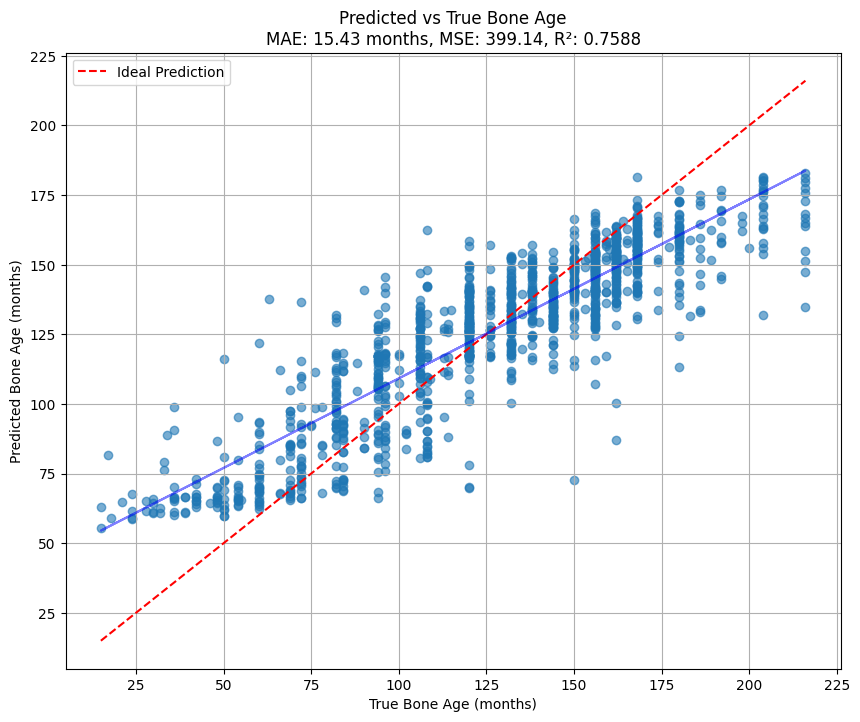


Final test set results:
MAE: 15.43 months
MSE: 399.14
RMSE: 19.98 months
R² Score: 0.7588


In [40]:
print("\nPlotting test predictions...")
test_mae, test_mse, test_r2 = plot_predictions(test_true_values, test_predictions)

print("\nFinal test set results:")
print(f"MAE: {test_mae:.2f} months")
print(f"MSE: {test_mse:.2f}")
print(f"RMSE: {np.sqrt(test_mse):.2f} months")
print(f"R² Score: {test_r2:.4f}")


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


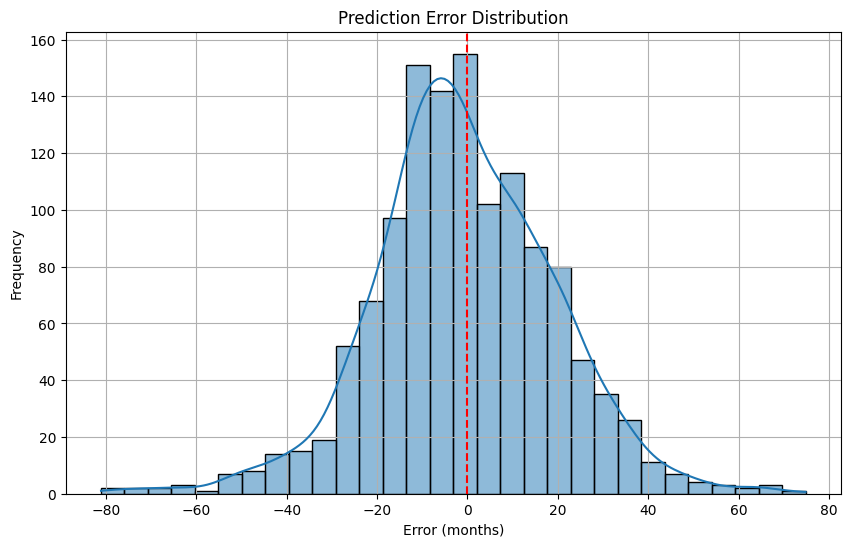

In [41]:
test_errors = (test_predictions - test_true_values) * 240  # Convert back to months

plt.figure(figsize=(10, 6))
sns.histplot(test_errors, kde=True, bins=30)
plt.title('Prediction Error Distribution')
plt.xlabel('Error (months)')
plt.ylabel('Frequency')
plt.axvline(x=0, color='r', linestyle='--')
plt.grid(True)
plt.savefig(f'{OUTPUT_DIR}/error_distribution.png')
plt.show()


In [42]:
best_model.save(f'{OUTPUT_DIR}/final_bone_age_model.keras')
print(f"\nFinal model saved to {OUTPUT_DIR}/final_bone_age_model.keras")



Final model saved to ./bone_age_models/final_bone_age_model.keras
